In [1]:
from phoenix import potentials, distributionfunctions, sampling, actions_to_phase_space
from phoenix.potentials import miyamoto_nagai_potential as Phi
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

/Users/annalena/Documents/GitHub/phoenix/phoenix/distributionfunctions.py:10: UserWarning: As of jaxtyping version 0.2.24, jaxtyping now prefers the syntax
```
from jaxtyping import jaxtyped
# Use your favourite typechecker: usually one of the two lines below.
from typeguard import typechecked as typechecker
from beartype import beartype as typechecker

@jaxtyped(typechecker=typechecker)
def foo(...):
```
and the old double-decorator syntax
```
@jaxtyped
@typechecker
def foo(...):
```
should no longer be used. (It will continue to work as it did before, but the new approach will produce more readable error messages.)
In particular note that `typechecker` must be passed via keyword argument; the following is not valid:
```
@jaxtyped(typechecker)
def foo(...):
```

  @jaxtyped
/Users/annalena/Documents/GitHub/phoenix/phoenix/distributionfunctions.py:38: UserWarning: As of jaxtyping version 0.2.24, jaxtyping now prefers the syntax
```
from jaxtyping import jaxtyped
# Use your favourite ty

In [2]:
#define parameters
params = {
    "R0": 8.0, # for actions to phase space
    "Rinit": 8.0, # for sampling
    "R0_thin": 5.0,
    "Rd_thin": 2.5,
    "Sigma0_thin": 100.0,
    "RsigR_thin": 8.0,
    "RsigZ_thin": 8.0,
    "sigmaR0_R0_thin": 40.0,
    "sigmaz0_R0_thin": 25.0,
    "L0_thin": 50.0,
    "Rinit_for_Rc_thin": 8.0,
    "R0_thick": 8.0,
    "Rd_thick": 2.0,
    "Sigma0_thick": 150.0,
    "RsigR_thick": 8.0,
    "RsigZ_thick": 4.0,
    "sigmaR0_R0_thick": 60.0,
    "sigmaz0_R0_thick": 40.0,
    "L0_thick": 50.0,
    "Rinit_for_Rc_thick": 8.0,
    "f_thin": 0.8,
    "f_thick": 0.2,
}

envelope_max = 3.0
n_candidates = 500_000
key = jax.random.PRNGKey(42)

#theta = (1e12, 20.0, 20.0)  # (M, a, b) z.B. für Miyamoto–Nagai
#theta_target = (1e12, 5.0, 2.0)  # (M, a, b) z.B. für Miyamoto–Nagai
theta = jnp.array([1e12, 20.0, 20.0])
theta_target = jnp.array([1e12, 5.0, 2.0])

In [3]:
#from parameters to phase space coordinates
@jax.jit
def params_to_phasespace(params, theta = theta, Phi= Phi, key=key, n_candidates=n_candidates, envelope_max=envelope_max):
    candidates, samples, soft_weights = sampling.sample_df_potential(key, params, Phi, theta, n_candidates, envelope_max, tau=0.01)
    phase_space_coords = actions_to_phase_space.map_actions_to_phase_space(samples, params, key, Phi, theta)
    return phase_space_coords

In [4]:
dparams_to_phasespace = jax.jacfwd(lambda p: params_to_phasespace(p), argnums=0)(params)

In [5]:
dtheta_to_phasespace = jax.jacfwd(lambda t: params_to_phasespace(params, theta=t), argnums=0)(theta)

In [6]:
print(dparams_to_phasespace)

{'L0_thick': Array([[-0., -0., -0.,  0.,  0., -0.],
       [-0.,  0., -0.,  0., -0.,  0.],
       [ 0.,  0., -0., -0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0.,  0.,  0., -0.],
       [-0., -0.,  0.,  0., -0., -0.],
       [ 0., -0., -0.,  0.,  0.,  0.]], dtype=float32), 'L0_thin': Array([[-0., -0., -0.,  0.,  0., -0.],
       [-0.,  0., -0.,  0., -0.,  0.],
       [ 0.,  0., -0., -0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0.,  0.,  0., -0.],
       [-0., -0.,  0.,  0., -0., -0.],
       [ 0., -0., -0.,  0.,  0.,  0.]], dtype=float32), 'R0': Array([[-0.0000000e+00, -0.0000000e+00, -0.0000000e+00,  0.0000000e+00,
         0.0000000e+00, -0.0000000e+00],
       [-0.0000000e+00,  0.0000000e+00, -0.0000000e+00,  0.0000000e+00,
        -0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00, -0.0000000e+00, -0.0000000e+00,
         0.0000000e+00,  0.0000000e+00],
       ...,
       [ 1.2216938e-13,  2.9911303e-13,  2.6206491e-19, -1.9521369e-09,
         7.9731760e-1

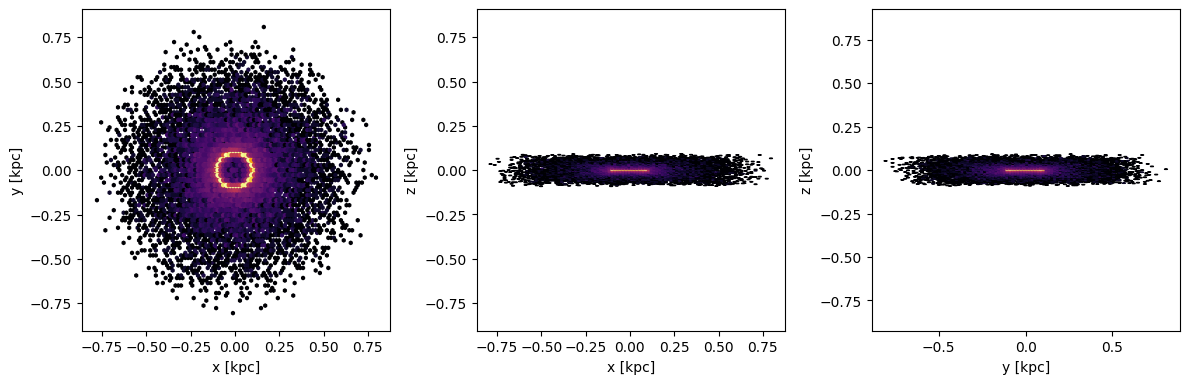

In [7]:
phase_space_coords = params_to_phasespace(params)

x = phase_space_coords[:, 0]
y = phase_space_coords[:, 1]
z = phase_space_coords[:, 2]

import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.hexbin(x, y, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('x [kpc]')
plt.ylabel('y [kpc]')
plt.axis('equal')
plt.subplot(132)
plt.hexbin(x, z, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('x [kpc]')
plt.ylabel('z [kpc]')
plt.axis('equal')
plt.subplot(133)
plt.hexbin(y, z, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('y [kpc]')
plt.ylabel('z [kpc]')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [8]:
target_phase_space_coords = params_to_phasespace(params, theta=theta_target)

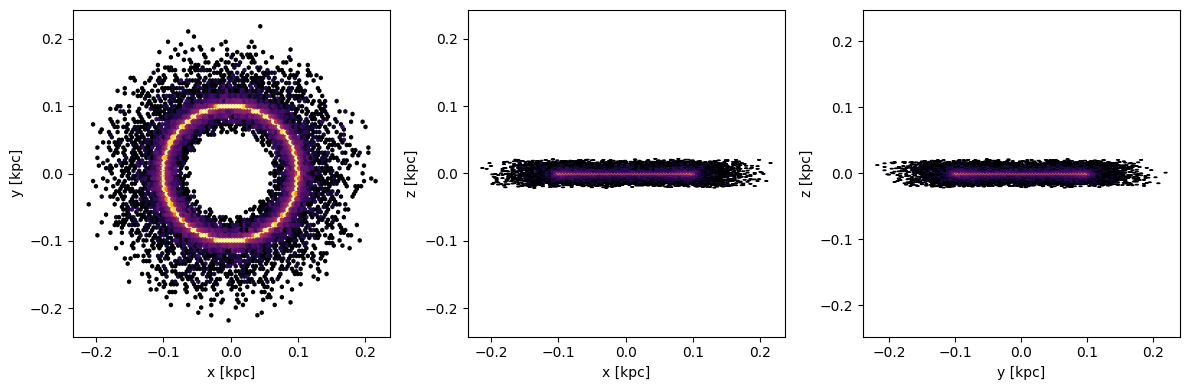

In [9]:
x_target = target_phase_space_coords[:, 0]
y_target = target_phase_space_coords[:, 1]
z_target = target_phase_space_coords[:, 2]

import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.hexbin(x_target, y_target, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('x [kpc]')
plt.ylabel('y [kpc]')
plt.axis('equal')
plt.subplot(132)
plt.hexbin(x_target, z_target, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('x [kpc]')
plt.ylabel('z [kpc]')
plt.axis('equal')
plt.subplot(133)
plt.hexbin(y_target, z_target, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('y [kpc]')
plt.ylabel('z [kpc]')
plt.axis('equal')
plt.tight_layout()
plt.show()